In [8]:
b.matlab_eng.slm_close(nargout=0)
b.matlab_eng.camera_close(nargout=0)
b.matlab_eng.quit()

In [35]:
# sio.savemat('data/self.concat_res=5/data.mat',dict([('ks_data_origin',ks_data_origin),
#                 ('b.output_w',b.output_w),('rmse',rmse),('rmse_vec',rmse_vec),
#                 ('rmse_vert',rmse_vert),('pred_output',pred_output),('xx_',xx_),
#                 ('tt',tt)]))

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import scipy.io as sio

# import os
# import sys
import numpy as np
import time

from reservoir import Reservoir
import data1D
import data_utils

%load_ext autoreload
%autoreload 2
%aimport data1D
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

import matlab.engine
# setx PATH "%PATH%;C:\Octave\Octave-5.1.0.0

In [2]:
# Input data
n_res=5000
n_sequence=1
spatial_points = 30
spatial_points_ = spatial_points
lyap_exp = 0.0461
n_train = 2000
n_test = 2000
forget = 100
parallel_runs = 1
ks_data_origin, xx, tt = data1D.kuramoto_sivashinsky_from_dataset(sequence_length=n_train+n_test, n_sequence=n_sequence, spatial_points=spatial_points)

In [3]:
# Matlab engine initialization
matlab_eng = matlab.engine.start_matlab()
matlab_eng.cd(r'D:\Users\Comedia\projects\reservoir-computing-python\hardware_control', nargout=0)

In [4]:
# Camera initialization
cam_roi = [200, 200]
cam_sampling_range = np.linspace(0, (cam_roi[0]-1)*(cam_roi[1]-1)-1, n_res, dtype='uint32')
if n_res > (cam_roi[0]-1)*(cam_roi[1]-1)-1:
    warnings.warn("The number of camera pixels is less than the required size of the reservoir")
matlab_eng.workspace['cam_roi'] = matlab.double(cam_roi)
matlab_eng.camera_open(nargout=0)

In [5]:
# SLM initialization
slm_size = [1920, 1152]
matlab_eng.workspace['slm_size'] = matlab.double(slm_size)
matlab_eng.slm_open(nargout=0)

In [6]:
# SLm & Camera close
# matlab_eng.slm_close(nargout=0)
# matlab_eng.camera_close(nargout=0)
# b.matlab_eng.slm_close(nargout=0)
# b.matlab_eng.camera_close(nargout=0)

In [7]:
b = Reservoir(n_res=n_res, res_scale=1, res_encoding='meadowlark slm', res_enc_param=128,
              remove_saturated_neurons=True, n_saturated_neurons=10, # reservoir cleanup 
              input_scale=1, input_encoding='meadowlark slm', input_enc_param=128,
              random_projection='meadowlark slm',
              scale_input_MinMax = (0, 1), scale_output_MinMax = (0, 1), # data standardization
              raw_input_feature = True, enc_input_feature = False, # concatenated states properties
              activation_fun='intensity_in_tanh',
              parallel_runs=parallel_runs,  bias_scale=1, leak_rate=0.1,
              pred_horizon=1, rec_pred_steps=200, forget = forget,
              train_method='ridge', train_param=0.1, verbose=1,
              cam_roi=cam_roi, cam_sampling_range=cam_sampling_range, 
              slm_size=slm_size, matlab_eng=matlab_eng # SLM experiment
             )

# Algorithm training
ks_data_train = ks_data_origin[:, :n_train, :]
input_shape = ks_data_train.shape
b.fit(ks_data_train);

Reservoir Computing algorithm - Training phase:

Initialization complete. 		Elapsed time: 1.2970740795135498 s
1.0 0.0 128
1.24386389033 -0.254999658002 128
0.81329152531 -0.0179632504551 128
0.775193105848 0.00541700102953 128
0.759033999251 0.00655909609628 128
0.776163924353 0.00620481298051 128
0.686282254027 0.00616406356266 128
0.597951315817 0.00615998862088 128
0.668460993173 0.0061595811267 128
0.675511960909 0.00640831322187 128
0.712186645724 0.00618441631938 128
0.79040910105 0.00619010244937 128
0.670095096897 0.00618717760093 128
0.57730765496 0.00619033689769 128
0.757991289924 0.00618720326993 128
0.990660163449 0.00619916329849 128
0.994111937941 0.00616551722324 128
0.915435986443 0.00616233863425 128
0.71807394843 0.00624647413296 128
0.716442844477 0.00621576369358 128
0.812430382176 0.00618834473854 128
0.936692323809 0.00618977356321 128
0.872995074829 0.00592804411369 128
1.10063953373 0.00589826665305 128
1.23784836854 0.00589584979091 128
1.05844658326 0.006156

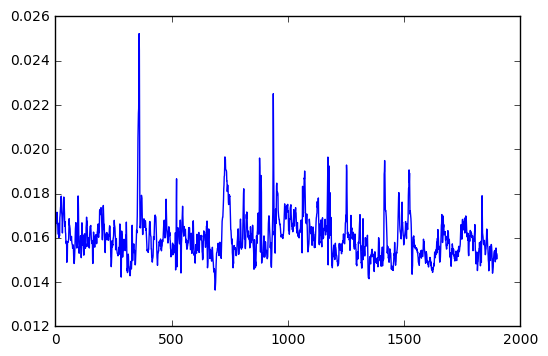

In [48]:
plt.plot(np.std(b.c[:, :-65].T, axis=0))

In [49]:
print(b.activation_param)
print(b.activation_param0)

233.0
68.4


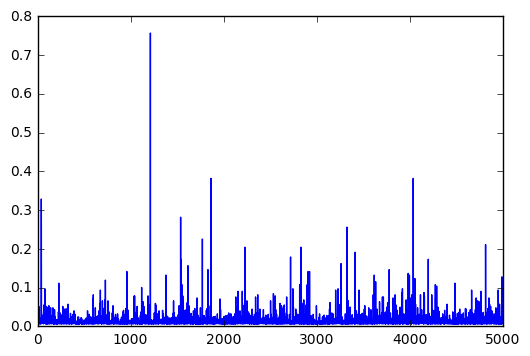

In [50]:
plt.plot(b.yy.T)

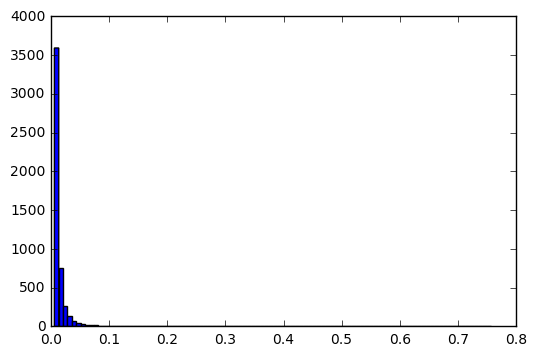

In [51]:
plt.hist((b.yy).T, bins=100);

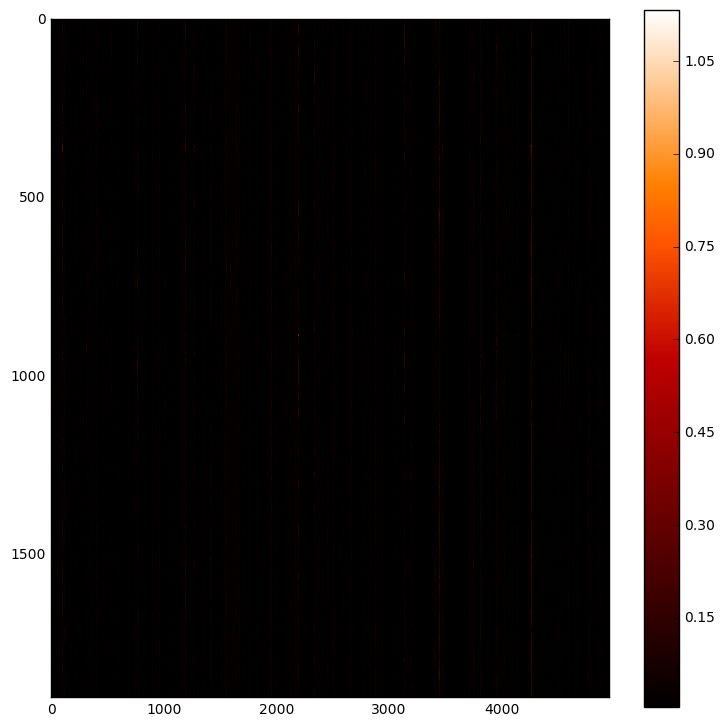

In [ ]:
plt.figure(1,figsize=(9,9))
im=plt.imshow(b.c[:,:-65], cmap='gist_heat', interpolation='none', aspect = 1.2*b.c.shape[1]/b.c.shape[0])
plt.colorbar(im)

In [ ]:
ks_data_test = ks_data_origin[:, n_train:, :]

# Algorithm testing
b.parallel_test_runs=100
pred_output, rmse, rmse_vec, rmse_vert = b.predict_and_score(ks_data_test, detailed_score=True)

Reservoir Computing algorithm - Testing phase:

Initialization complete. 		Elapsed time: 0.00500035285949707 s
1.0 0.0 128
1.13669982086 -0.235275240174 128
0.483971461642 -0.0124966842379 128
0.654468305709 0.00567701119997 128
0.686257919926 0.00610315730659 128
0.734633152612 0.00576924942479 128
0.770338752689 0.00574793169865 128
0.712752499271 0.00591269181369 128
0.662780897661 0.00574057017195 128
0.615195966978 0.00572142861905 128
0.583024856803 0.00591004150573 128
0.679113575035 0.00573837575243 128
0.688722446858 0.0057212091771 128
0.719658814111 0.00591001956154 128
0.832040670514 0.00592890059998 128
0.891662668396 0.00593078870382 128
0.995727511472 0.00574046952685 128
1.00613399578 0.00591194559651 128
1.00717464421 0.00592909320348 128
0.892974193678 0.00574028092221 128
0.865422817231 0.00591192673605 128
1.02588535718 0.00592909131743 128
1.27880912304 0.00593080777557 128
1.13238912267 0.00593097942138 128
1.00339726326 0.005740469544 128
0.990498077323 0.0059119

best plot is at 54


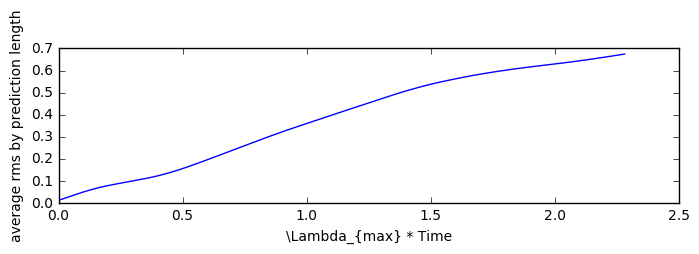

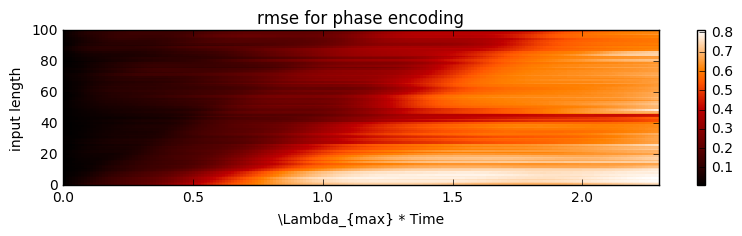

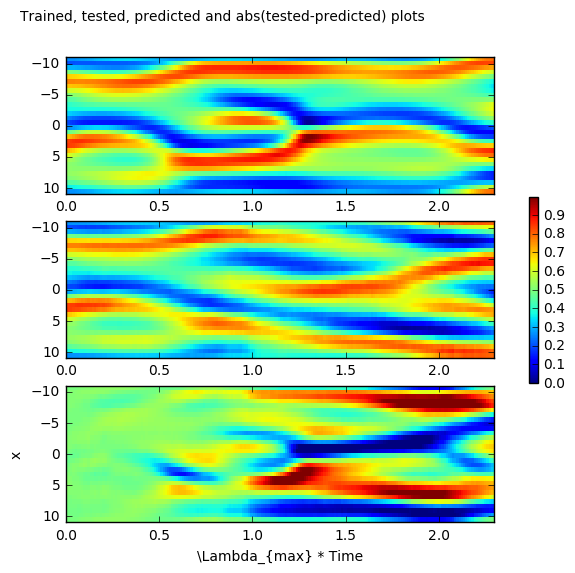

In [ ]:
total_pred = (rmse.shape[1])
length_input = pred_output.shape[0] - total_pred
time_input = range(rmse.shape[0])
time_pred = tt[0:total_pred]*lyap_exp
t_min = 0
t_max = (tt[b.forget+total_pred]-tt[b.forget])*lyap_exp
x_min = xx.min()
x_max = xx.max()

plt.figure(1,figsize=(8,2))
plt.ylabel('average rms by prediction length')
plt.xlabel('\Lambda_{max} * Time')
plt.plot(time_pred[:], rmse_vec[:])
# scipy.io.savemat('time_pred_new_2.mat', dict(time_pred_new_2=time_pred))
# scipy.io.savemat('rmse_vec_new_2.mat', dict(rmse_vec_new_2=rmse_vec))
plt.show;
# plt.savefig('phase_LM_kuramoto_rmse.png', dpi=400)

plt.figure(2,figsize=(10,2))
plt.title('rmse for phase encoding')
plt.ylabel('input length')
plt.xlabel('\Lambda_{max} * Time')
im=plt.imshow(rmse[:,:], cmap='gist_heat', interpolation='nearest', 
              aspect = 0.003*total_pred/b.parallel_test_runs, 
              extent = [t_min , t_max, 0, b.parallel_test_runs])
plt.colorbar(im)
plt.show;

############################################################################
n_input = np.argmin(np.sum(rmse[:,:], axis=1)) # np.argmin(rmse_vert)
# n_input = 198
#############################################################################
total_pred = b.pred_horizon*b.rec_pred_steps

input_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, b.forget:b.forget+total_pred, :]
targetted_data = data_utils.data_preprocessing(
    ks_data_test, standardize=b.output_standardize,
    scale_min_max=b.scale_output_MinMax)[0, n_input+b.forget:n_input+b.forget+total_pred, :]

prediction = pred_output[n_input, :].reshape(targetted_data.shape)

vmax = max(np.concatenate((targetted_data, input_data)).flatten())
vmin = 0

# plot training data
fig, axs = plt.subplots(3, 1, sharex=False, figsize=(9,6))
plt.suptitle('Trained, tested, predicted and abs(tested-predicted) plots                       ')
plt.ylabel('x')
plt.xlabel('\Lambda_{max} * Time')

datum = [targetted_data, prediction, targetted_data-prediction+0.5]
for i in range(3):
        im=axs[i].imshow(datum[i].T, cmap=plt.get_cmap('jet'), interpolation='nearest', 
                         aspect = 0.005*total_pred/spatial_points, 
                         extent = [t_min , t_max, x_min , x_max], vmin=vmin, vmax=vmax)
        axs[i].invert_yaxis()
#     im=axs[i].pcolormesh(time_axs, xx_axs, datum[i].T, cmap=plt.get_cmap('jet'), vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.4)
# plt.savefig('phase_SLM_kuramoto_pred.png', dpi=400)

print('best plot is at '+str(np.argmin(rmse_vert)))